<a href="https://colab.research.google.com/github/bishalpanthi321/Disease-Prediction/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.69G/2.70G [00:35<00:00, 51.0MB/s]
100% 2.70G/2.70G [00:35<00:00, 81.7MB/s]


In [ ]:
import zipfile

# Open the zip file
with zipfile.ZipFile('/content/new-plant-diseases-dataset.zip', 'r') as zip_ref:

    # Extract specific folders (train, test, valid) from the zip
    zip_ref.extractall()

Importing the Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data pre-processing

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

# Load the training dataset from the specified directory
training_set = image_dataset_from_directory(
    directory='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',  # Path to training data
    labels='inferred',  # Automatically infer labels from folder names
    label_mode='categorical',  # Use one-hot encoding for labels
    batch_size=32,  # Set batch size for training
    image_size=(128, 128),  # Resize images to 128x128 pixels
    shuffle=True,  # Shuffle the dataset for better training
    interpolation='bilinear',  # Resize using bilinear interpolation
    verbose=True  # Display loading details
)

# Print confirmation of successful dataset loading
print("Training dataset loaded successfully.")



Found 70295 files belonging to 38 classes.
Training dataset loaded successfully.


Validation set Image Preprocessing

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

# Define the path to the training data directory
train_data_path = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

# Create a dataset for training using the image_dataset_from_directory function
train_dataset = image_dataset_from_directory(
    train_data_path,  # Path to the dataset
    labels='inferred',  # Generate labels from folder names
    label_mode='categorical',  # Convert labels into one-hot encoded format
    batch_size=32,  # Number of images in each batch
    image_size=(128, 128),  # Resize all images to 128x128
    shuffle=True,  # Enable shuffling for better data distribution
    interpolation='bilinear',  # Use bilinear interpolation for resizing
    verbose=True  # Show details during dataset loading
)

# Confirm that the training dataset has been prepared
print("Training data preparation complete!")


Found 70295 files belonging to 38 classes.
Training data preparation complete!


In [ ]:
# Iterate through the training set
for images, labels in training_set:
    print("Images batch:", images)
    print("Images batch shape:", images.shape)
    print("Labels batch:", labels)
    print("Labels batch shape:", labels.shape)
    break  # Exit after the first batch

tf.Tensor(
[[[[ 60.5   66.5   66.5 ]
   [ 65.25  71.25  71.25]
   [ 63.75  69.75  69.75]
   ...
   [ 80.25  86.25  86.25]
   [ 77.    83.    83.  ]
   [ 78.    84.    84.  ]]

  [[ 63.75  69.75  69.75]
   [ 63.5   69.5   69.5 ]
   [ 63.75  69.75  69.75]
   ...
   [ 75.25  81.25  81.25]
   [ 78.    84.    84.  ]
   [ 81.5   87.5   87.5 ]]

  [[ 59.25  65.25  65.25]
   [ 62.5   68.5   68.5 ]
   [ 61.5   67.5   67.5 ]
   ...
   [ 77.5   83.5   83.5 ]
   [ 78.25  84.25  84.25]
   [ 79.25  85.25  85.25]]

  ...

  [[ 75.    74.    70.  ]
   [ 67.75  66.75  62.75]
   [ 71.5   70.5   66.5 ]
   ...
   [ 64.75  62.75  63.75]
   [ 62.75  60.75  61.75]
   [ 60.    58.    59.  ]]

  [[ 68.25  67.25  63.25]
   [ 71.25  70.25  66.25]
   [ 70.    69.    65.  ]
   ...
   [ 63.    61.    62.  ]
   [ 64.5   62.5   63.5 ]
   [ 64.    62.    63.  ]]

  [[ 64.75  63.75  59.75]
   [ 59.75  58.75  54.75]
   [ 69.    68.    64.  ]
   ...
   [ 63.5   61.5   62.5 ]
   [ 67.    65.    66.  ]
   [ 65.    63.    6

Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
model = Sequential()

Building the Conv0lution Layer

In [ ]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [ ]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [ ]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(units=1500, activation='relu'))

In [ ]:
model.add(Dropout(0.4))

In [ ]:
model.add(Dense(units=38, activation='softmax'))

Compiling the Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Model **Training**

In [ ]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 159s 66ms/step - accuracy: 0.4068 - loss: 2.0935 - val_accuracy: 0.8326 - val_loss: 0.5425
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 186s 63ms/step - accuracy: 0.8360 - loss: 0.5231 - val_accuracy: 0.9041 - val_loss: 0.2996
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 132s 60ms/step - accuracy: 0.9039 - loss: 0.2995 - val_accuracy: 0.9414 - val_loss: 0.1816
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 140s 60ms/step - accuracy: 0.9355 - loss: 0.1955 - val_accuracy: 0.9419 - val_loss: 0.1778
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.9528 - loss: 0.1482 - val_accuracy: 0.9442 - val_loss: 0.1760
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 131s 60ms/step - accuracy: 0.9619 - loss: 0.1154 - val_accuracy: 0.9506 - val_loss: 0.1585
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 63ms/step - accuracy: 0.9698 - loss: 0.0906 - val_accuracy: 0.9537 - val_loss: 0.1472
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 130s 59ms/step - accuracy: 

Model Evaluation

In [ ]:
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 55s 25ms/step - accuracy: 0.9903 - loss: 0.0317


In [ ]:
print(train_loss, train_acc)

0.030205681920051575 0.9904829859733582


In [ ]:
#Model on Validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9599 - loss: 0.1431


In [ ]:
print(val_loss, val_acc)

0.12926991283893585 0.9636353254318237


Saving the Model

> Add blockquote



In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

{'accuracy': [0.605249285697937,
  0.8583256006240845,
  0.9125969409942627,
  0.9405505657196045,
  0.9544917941093445,
  0.9644071459770203,
  0.9698129296302795,
  0.9759015440940857,
  0.979173481464386,
  0.9812504649162292],
 'loss': [1.3377580642700195,
  0.44820162653923035,
  0.2712763845920563,
  0.18208040297031403,
  0.14080016314983368,
  0.10779979825019836,
  0.0918012335896492,
  0.07447028905153275,
  0.06512961536645889,
  0.05789203196763992],
 'val_accuracy': [0.8325745463371277,
  0.9041088223457336,
  0.9413840174674988,
  0.9418962001800537,
  0.9442294836044312,
  0.9506032466888428,
  0.9536762833595276,
  0.9642613530158997,
  0.969155490398407,
  0.9636353254318237],
 'val_loss': [0.5425029993057251,
  0.299559086561203,
  0.1816096007823944,
  0.177759051322937,
  0.17598681151866913,
  0.15851527452468872,
  0.14717522263526917,
  0.1200186088681221,
  0.09984232485294342,
  0.1292700171470642]}

*Recording* the history

In [ ]:
import json
with open("training_history.json", "w") as f:
  json.dump(training_history.history, f)

*Accuracy* Visulization

Text(0.5, 1.0, 'Visualization of Training data accuracy')

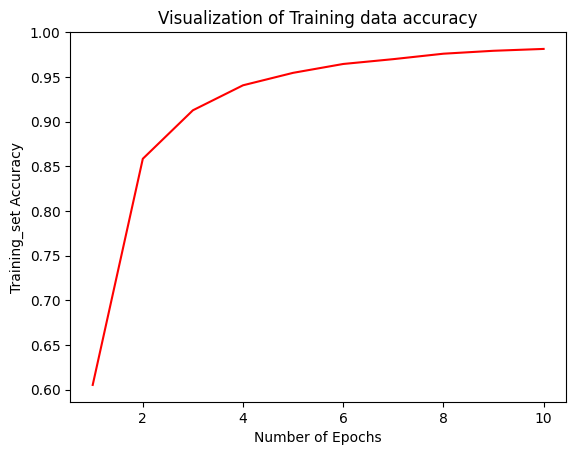

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color = 'red', label ='Training Accuracy' )
plt.xlabel("Number of Epochs")
plt.ylabel("Training_set Accuracy")
plt.title("Visualization of Training data accuracy")

Text(0.5, 1.0, 'Visualization of Valid  data accuracy')

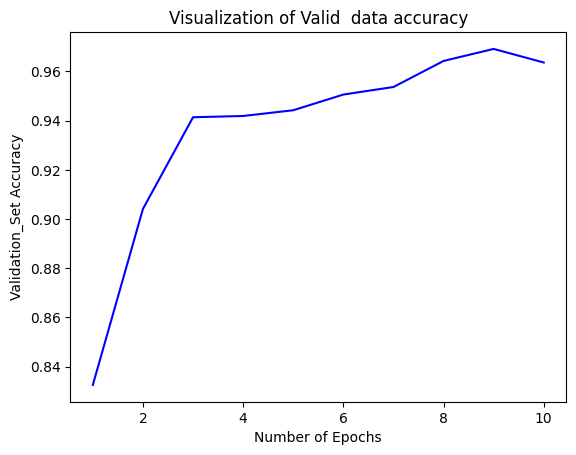

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['val_accuracy'], color = 'blue', label ='Validation Accuracy' )
plt.xlabel("Number of Epochs")
plt.ylabel("Validation_Set Accuracy")
plt.title("Visualization of Valid  data accuracy")

Some other matrices for model evaluation

> Add blockquote




In [ ]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step


(array([[1.00000000e+00, 6.29074755e-13, 5.61036731e-13, ...,
         1.06728269e-17, 2.98965076e-17, 4.33673246e-15],
        [9.99955535e-01, 4.41310222e-05, 3.01082870e-09, ...,
         5.49156159e-14, 1.82695851e-12, 1.12962667e-10],
        [1.00000000e+00, 8.37764951e-17, 1.15320793e-15, ...,
         5.51753551e-23, 1.36180111e-21, 3.63387733e-19],
        ...,
        [2.49969268e-09, 1.05514474e-13, 5.87049520e-09, ...,
         3.06590482e-11, 1.03453227e-11, 9.99988914e-01],
        [1.41503929e-08, 1.09457443e-11, 1.58271494e-08, ...,
         1.22120147e-09, 1.31038536e-09, 9.99997258e-01],
        [1.38630275e-12, 1.72717302e-14, 4.36009701e-14, ...,
         5.88181542e-15, 2.20514991e-12, 9.99999642e-01]], dtype=float32),
 (17572, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)
print(true_categories)

tf.Tensor(
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]], shape=(17572, 38), dtype=float32)


In [ ]:
Y_true =  tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.97      0.96       504
                                 Apple___Black_rot       1.00      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.94      0.95      0.94       440
                                   Apple___healthy       0.99      0.95      0.97       502
                               Blueberry___healthy       0.97      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.97      0.97       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.94      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.94      0.

In [ ]:
cm = confusion_matrix(Y_true, predicted_categories)
cm.shape


(38, 38)

[link text](https://)Visualization of Confusion Matrix

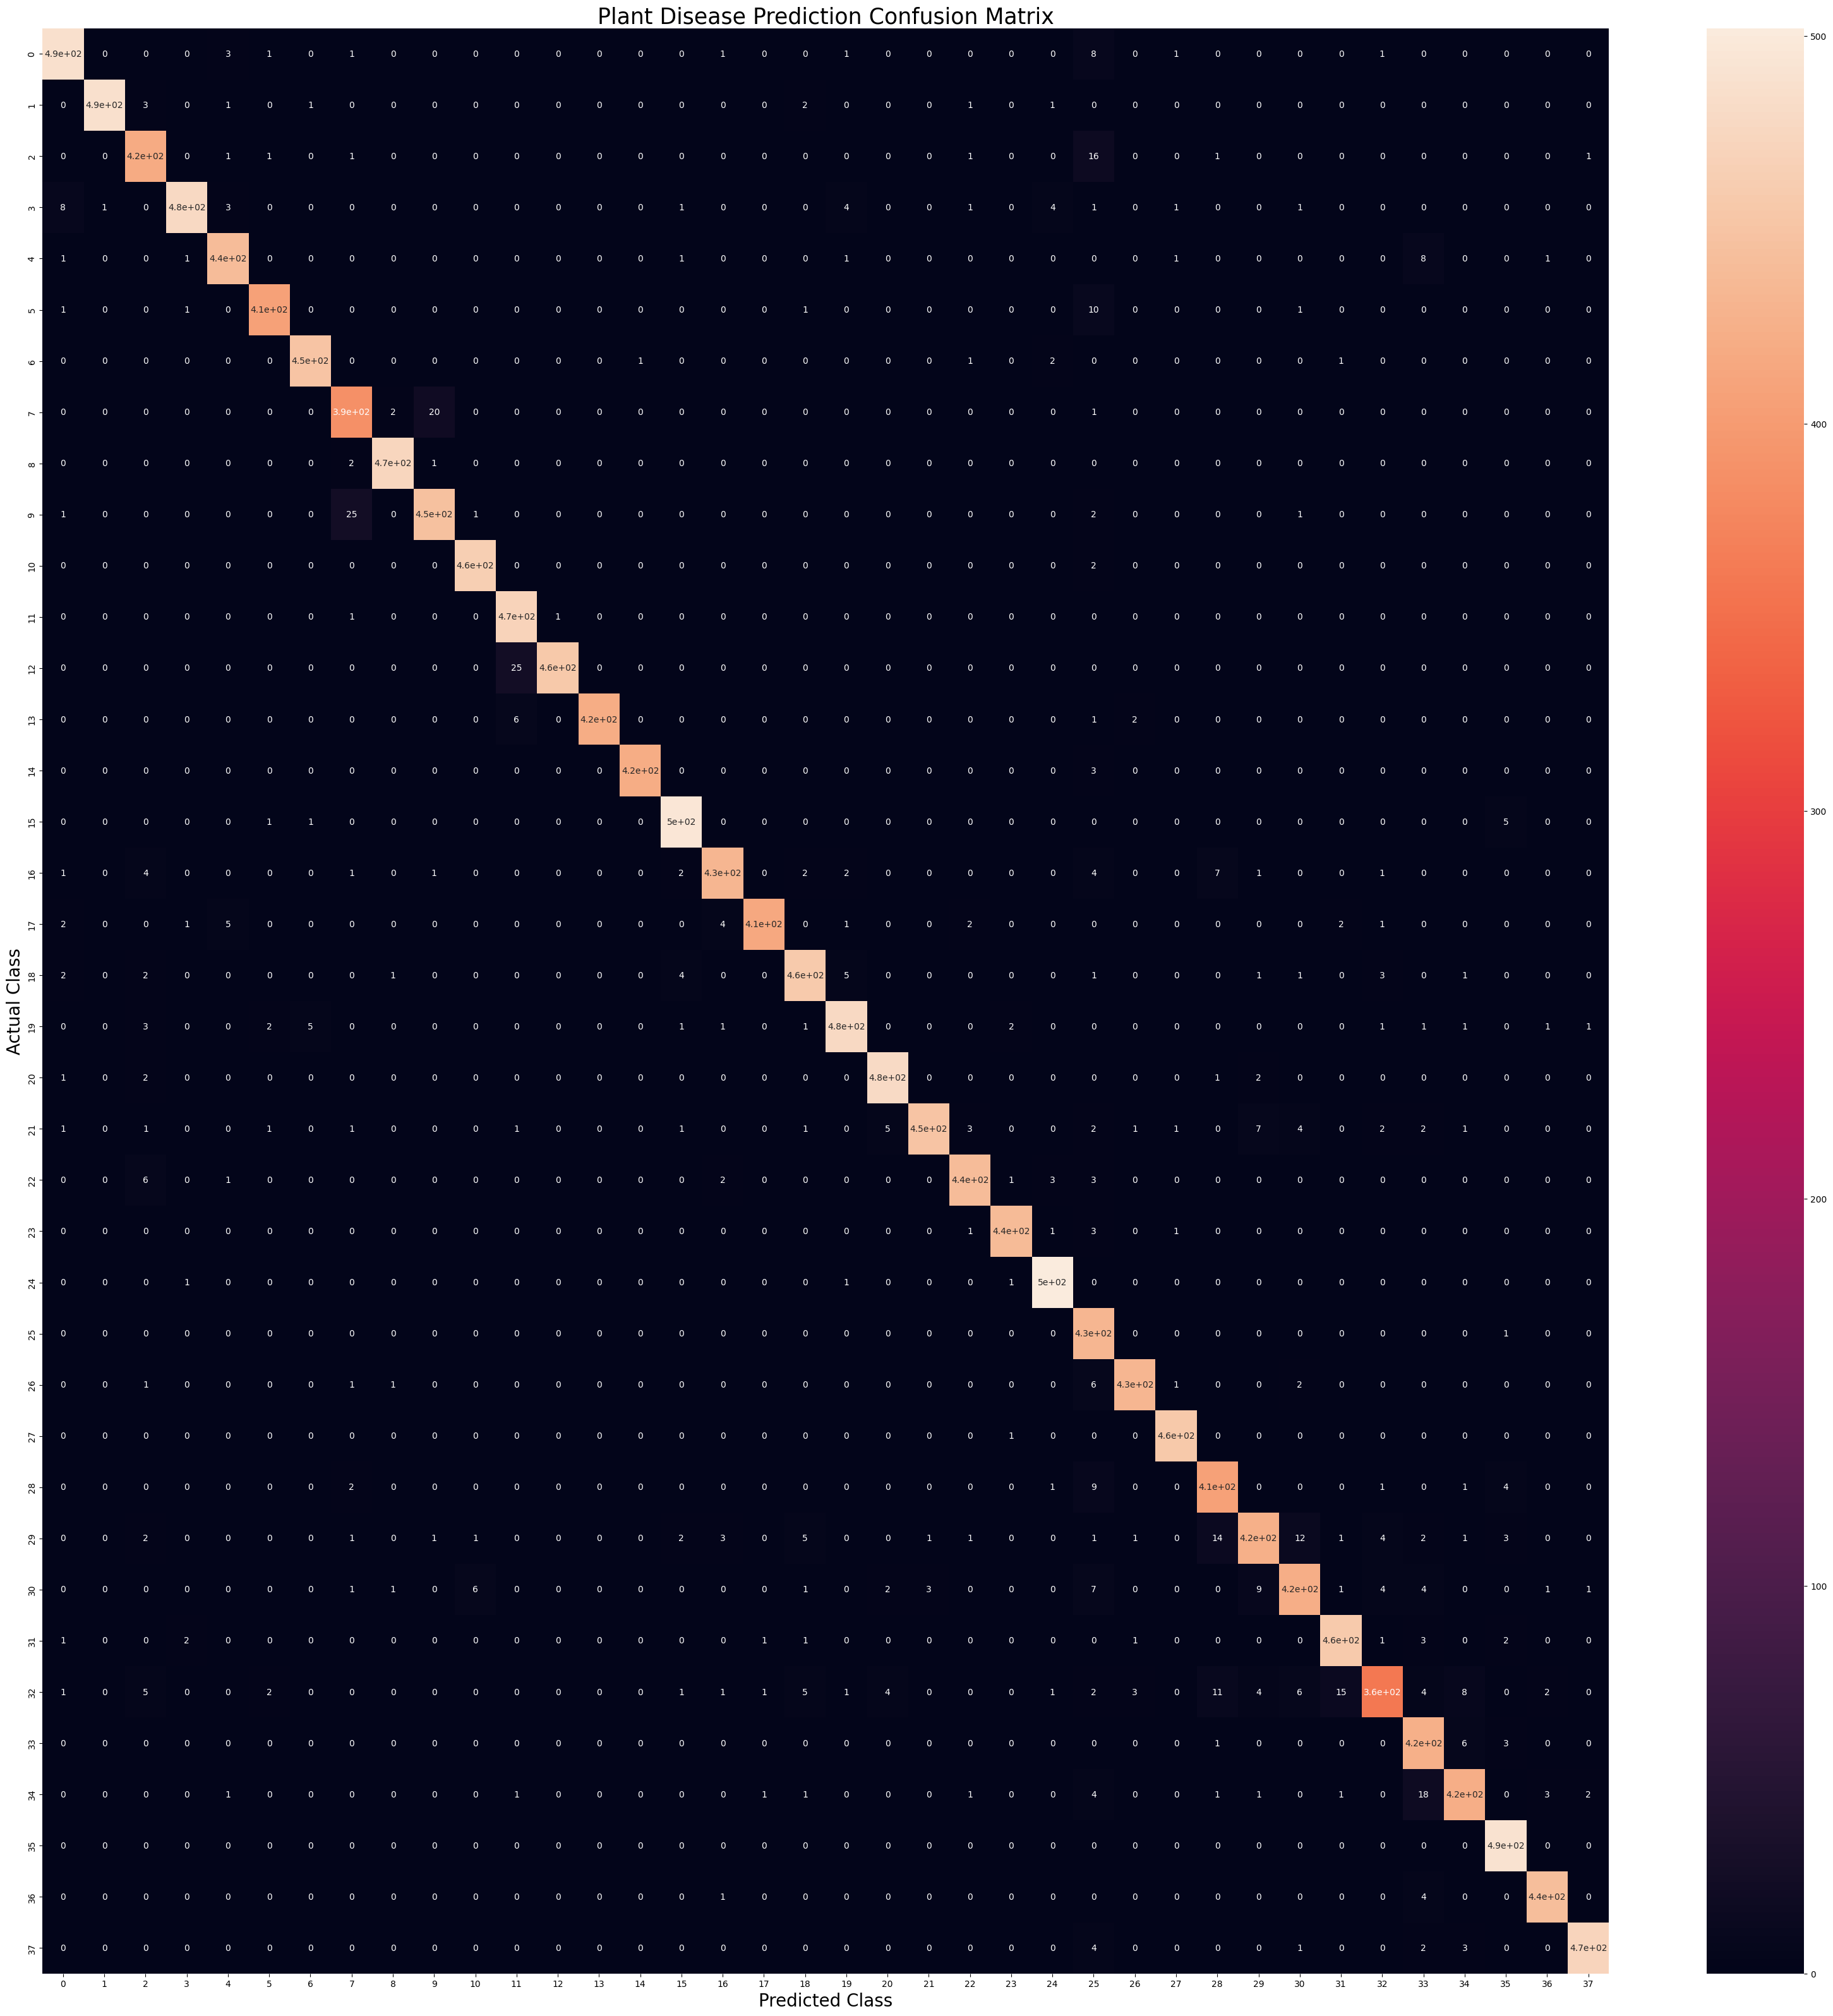

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot = True, annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize = 20)
plt.ylabel("Actual Class", fontsize = 20)
plt.title("Plant Disease Prediction Confusion Matrix",  fontsize=25)
plt.show()